In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import torch
import random
import numpy as np

seed = 1 # random.randint(1, 10000)
random.seed(seed)
torch.manual_seed(seed)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
from MSG_GAN import MSG_GAN
DEPTH = 7 # Final image size is 2**DEPTH
LATENT_SIZE = 512 # Size of the input latent space
model = MSG_GAN(DEPTH, LATENT_SIZE)

In [3]:
fixed_input = torch.randn(9, LATENT_SIZE).to(device)
fixed_input = (fixed_input/ fixed_input.norm(dim=-1, keepdim=True)* (LATENT_SIZE ** 0.5))

In [10]:
checkpoint = torch.load("70_save.pt")
model.gen.load_state_dict(checkpoint["gen"])
model.gen_shadow.load_state_dict(checkpoint["gen_shadow"])

<All keys matched successfully>

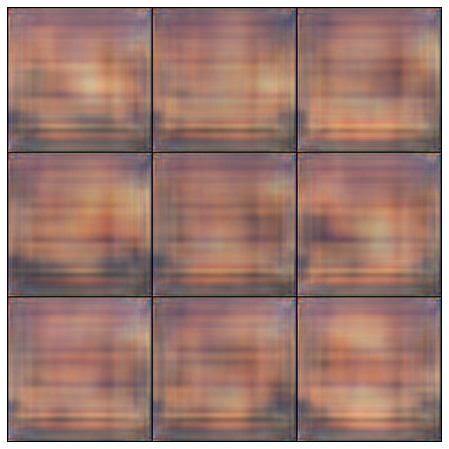

In [11]:
final_imgs = []
for i in range(9):
    img = model.gen_shadow(fixed_input[i].unsqueeze(dim=0))[-1].detach().cpu()
    final_imgs.append(img.squeeze())
import torchvision.utils as vutils
grid = vutils.make_grid(final_imgs, nrow=int(np.sqrt(len(final_imgs))),
                        normalize=True, scale_each=True, padding=2)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.axis("off")
plt.imshow(np.transpose(grid,(1,2,0)))